In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/train (1).csv')
print("Dataset Shape:", df.shape)
print(df.head())

df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

Dataset Shape: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePri

In [57]:
df = pd.get_dummies(df, drop_first=True)

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Linear Regression - R²: {r2_lin:.4f}, MSE: {mse_lin:.2f}")
print(f"Ridge Regression  - R²: {r2_ridge:.4f}, MSE: {mse_ridge:.2f}")

Linear Regression - R²: 0.6434, MSE: 2735171964.75
Ridge Regression  - R²: 0.6846, MSE: 2419332927.15


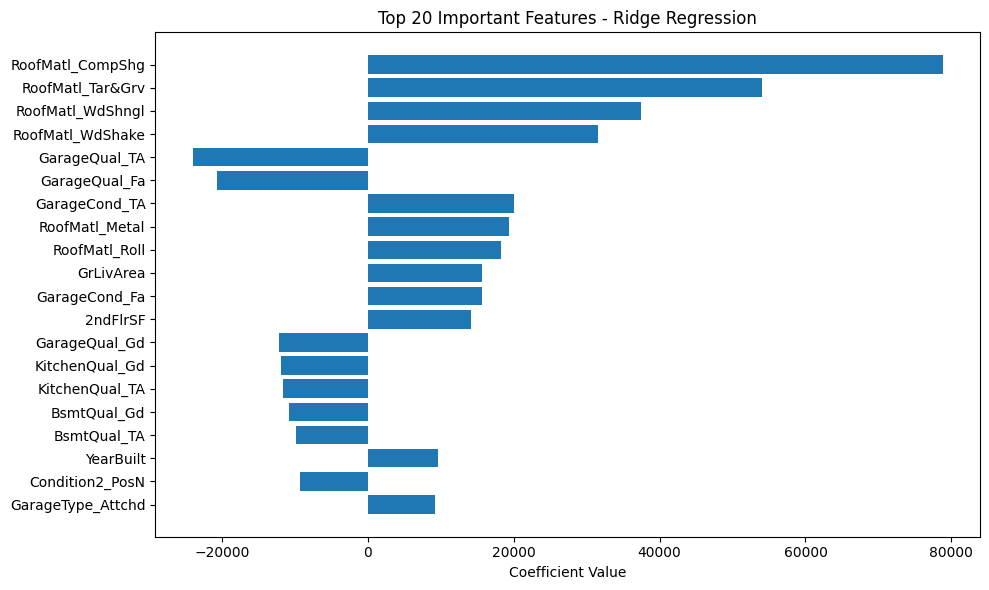

In [60]:
coefficients = ridge_reg.coef_
features = X.columns

top_n = 20
top_indices = np.argsort(np.abs(coefficients))[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), coefficients[top_indices], align='center')
plt.yticks(range(top_n), [features[i] for i in top_indices])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Important Features - Ridge Regression')
plt.tight_layout()
plt.show()